# TASK #1: PROJECT OVERVIEW 


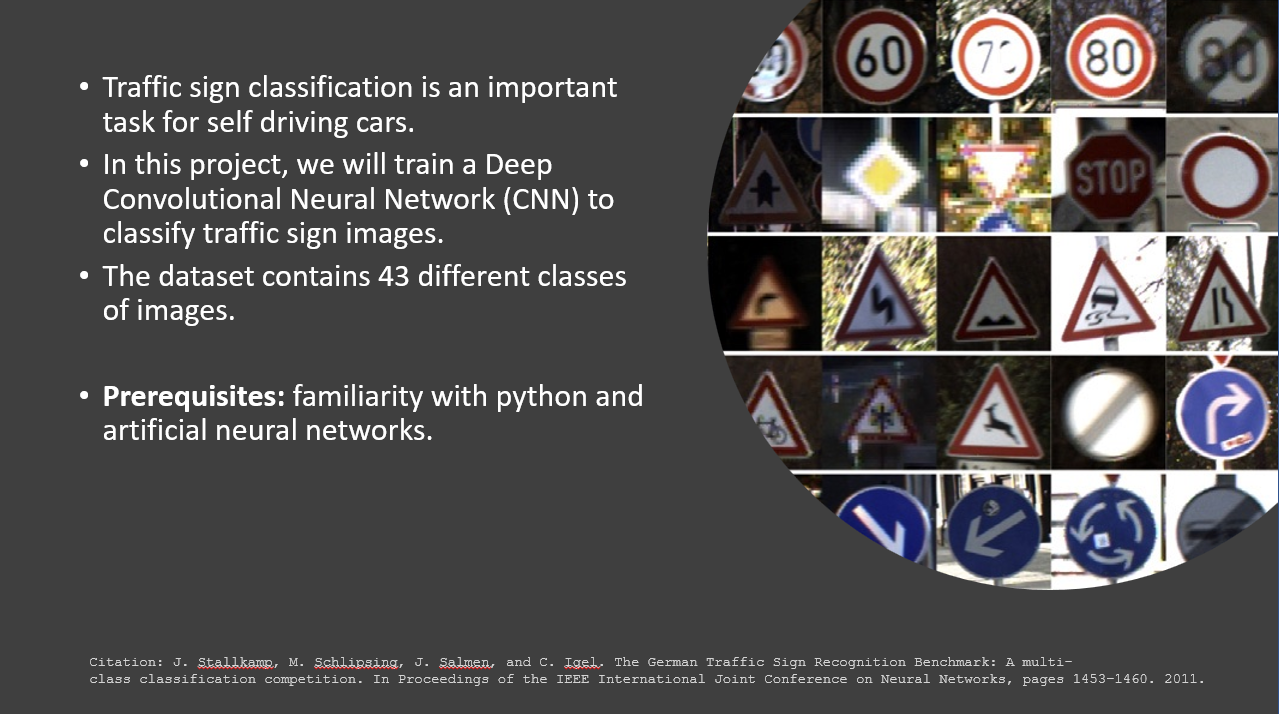

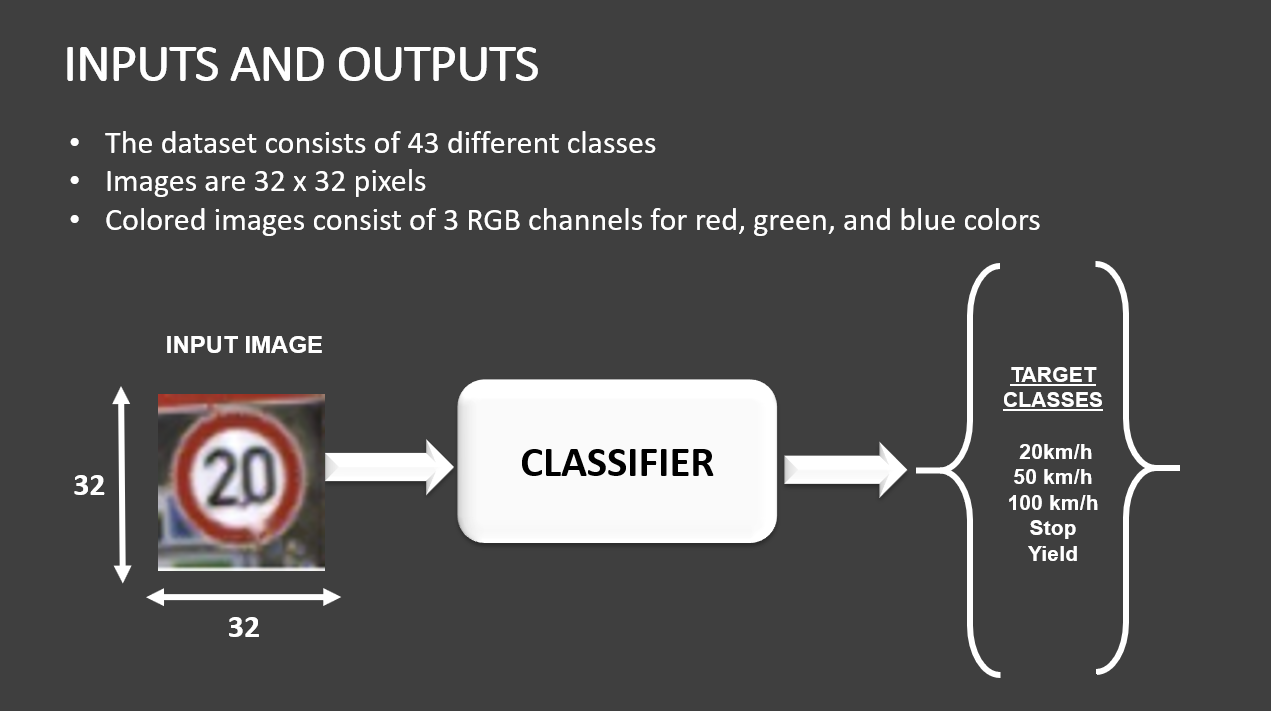

# TASK #2: MOUNT DRIVE AND IMPORT LIBRARIES/DATASETS

In [ ]:
#for mounting thr notebook from the drive , so that the the data can be imported from the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt               #for visualization
import numpy as np                            #for numerical analysis
import tensorflow as tf                       #for building ML & DL Models (Google's Framework)
import pandas as pd                           #for dataframe visulaization
import seaborn as sns                         #for visualization
import pickle                                 #for data serialization and deserilzation i.e. to load our data
import random                                 #to generate random numbers

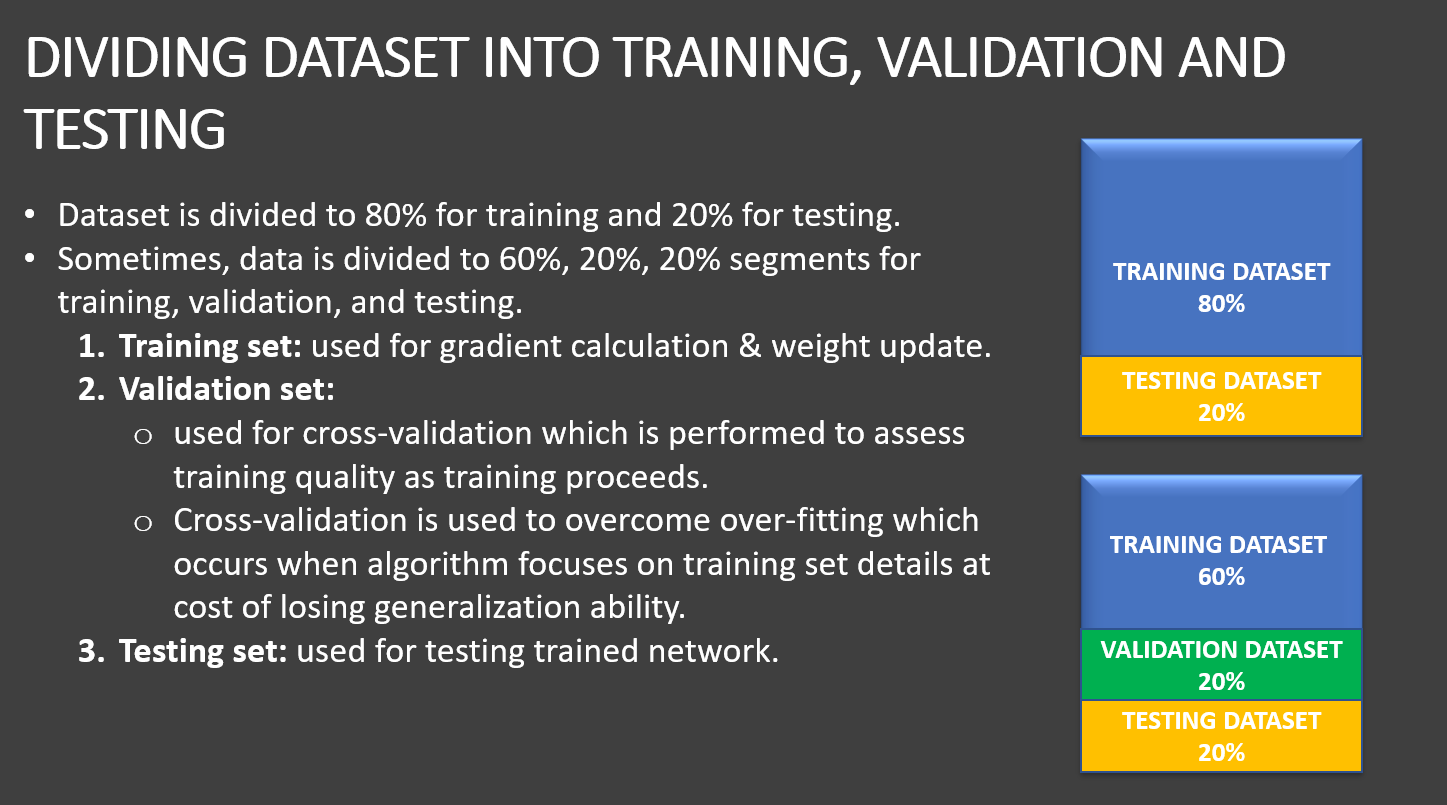

In [ ]:
with open("/content/drive/MyDrive/Colab Notebooks/Traffic Sign Detection/Data Sets/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("/content/drive/MyDrive/Colab Notebooks/Traffic Sign Detection/Data Sets/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("/content/drive/MyDrive/Colab Notebooks/Traffic Sign Detection/Data Sets/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [ ]:
type(train)

dict

In [ ]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

# The first line of code is assigning the features data from the 'train' dataset to the variable 'X_train', and the corresponding labels data to 'y_train'.
# The second line of code is doing the same thing for the validation dataset, assigning the features data to 'X_validation' and the labels to 'y_validation'.
# The third line of code is doing the same thing for the test dataset, assigning the features data to 'X_test' and the labels to 'y_test'.

### X Label of Training DataSet
The shape of your dataset is (34799, 32, 32, 3).

This means that you have 34,799 samples (instances) in your dataset, and each sample has a shape of 32x32 pixels with 3 color channels (RGB).

In other words, each instance in your dataset is an image that is 32 pixels wide, 32 pixels tall, and has 3 color channels (red, green, and blue). This is a common shape for image datasets, especially those used for computer vision tasks such as image classification or object detection.

In [ ]:
X_train.shape

(34799, 32, 32, 3)

### Y Label of Training DataSet:

The shape of the y training dataset, (34799,), indicates that it is a 1-dimensional array with 34,799 elements.

In machine learning, this type of array is typically used to represent the labels or target values for each instance in the training dataset.

In your case, it's likely that each element in the y training dataset corresponds to a label or class for the corresponding image in the x training dataset.

So, if you have 34,799 images in your x training dataset, you should also have 34,799 labels in your y training dataset, where each label corresponds to the class of the image.

In [ ]:
y_train.shape

(34799,)

# TASK #3: PERFROM IMAGES VISUALIZATION

9

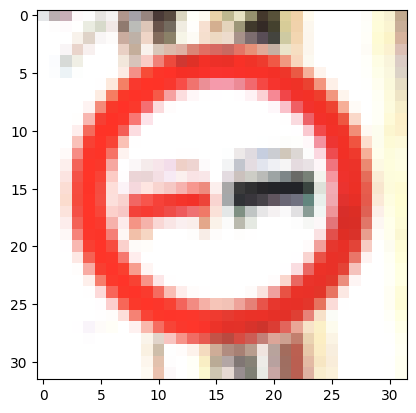

In [ ]:
i = np.random.randint(1, len(X_train))        #gives a random integer between 1 to the length of the training data i.e. 34799
plt.imshow(X_train[i])                        #for printing out the X (feature) of the training data which is an image
y_train[i]                                    #for printing out the Y (label) of the training data which is number assigned to the output

### Let's view more images in a grid format

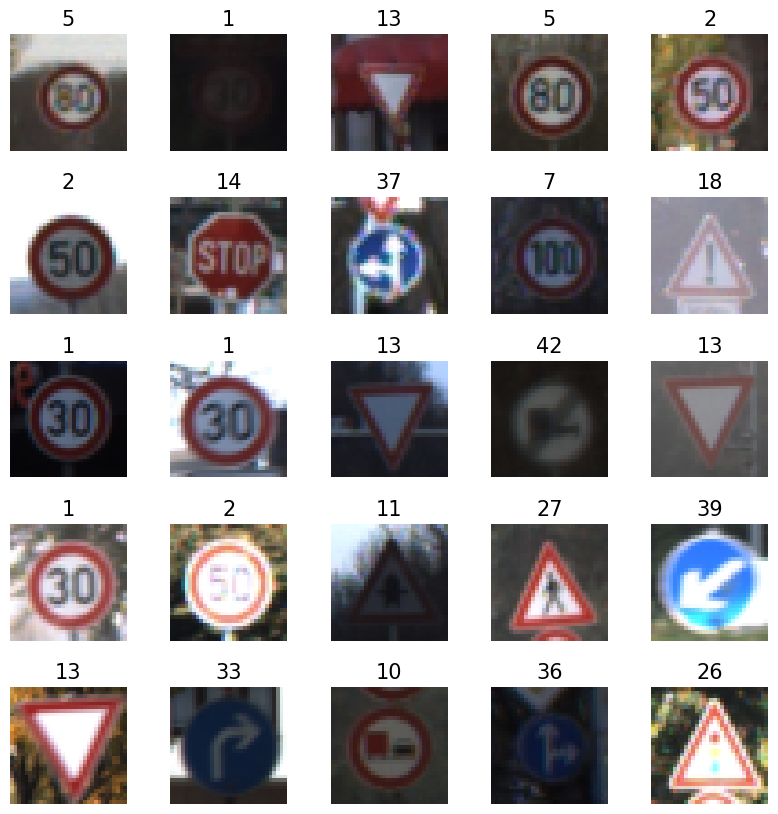

In [ ]:
# Define the dimensions of the plot grid 
#This code is used to display a grid of randomly selected images from a training dataset, along with their corresponding labels.
#It's a useful way to get a sense of the data and see what types of images are in the dataset.


#These lines are defining the width and length of the grid that the images will be displayed in. 
#In this case, we're using a 5x5 grid, so there will be 25 images displayed.  
W_grid = 5                      
L_grid = 5          
          

#This line creates a figure with subplots, using the subplots() function from the matplotlib library. 
# The figsize parameter sets the size of the figure in inches. 
# The L_grid and W_grid parameters specify how many rows and columns of subplots we want,
# and the axes variable holds a reference to these subplots so that we can manipulate them later.
fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

#This line flattens the axes array into a 1D array. This makes it easier to iterate over the subplots later. 
axes = axes.ravel()       

# The length of the training dataset is stored in the variable n_training.
n_training = len(X_train)          

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)

    # These lines display the selected image and label on the i-th subplot. 
    axes[i].imshow( X_train[index])                         #imshow() displays the image on the subplot
    axes[i].set_title(y_train[index], fontsize = 15)        #set_title() sets the title of the subplot to the label of the image
    axes[i].axis('off')                                     #axis('off') removes the axis labels from the subplot.


#This line adjusts the spacing between the subplots to make them look more visually appealing.
plt.subplots_adjust(hspace=0.4)

        

# TASK #4: CONVERT IMAGES TO GRAYSCALE AND PERFORM NORMALIZATION

## **Shuffling the Training Data**

In [ ]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)   

# Why shuffling?
# -> In machine learning, it's common to shuffle the training data to avoid any biases that may be introduced by the ordering of the data.
# For example, we don't want the model to continoudly learn 100 STOP signs, 
# as it might lead to the model learning some spurious pattern that doesn't actually generalize well to new data.

## **Understanding Images**


### **Understanding Images**


Digital images are represented as matrices of pixels, where each pixel corresponds to a small unit of the image. Color images are typically represented using a combination of red, green, and blue (RGB) color channels. Each pixel in an RGB image has three color values, representing the intensity of red, green, and blue light in that pixel. By combining these three color channels, we can create a full color image.

For example, a 400x400 RGB image is represented by a 3D array of shape (400, 400, 3), where the first two dimensions represent the height and width of the image, and the third dimension represents the color channels (red, green, and blue). The value of each pixel is a 3-tuple of integers between 0 and 255, indicating the intensity of each color channel.

In contrast, grayscale images only have a single color channel, which represents the brightness or intensity of each pixel. Grayscale images are represented as 2D arrays of shape (height, width), where each pixel value is a single integer between 0 and 255, indicating the brightness level of that pixel.

Understanding color channels is important in image processing and computer vision, as it allows us to manipulate and analyze the different components of an image separately, and develop algorithms to detect patterns and features across different color channels.

##**Conversion of RGB Images to Grayscale Images**


 **Explanation of X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)**


This line of code converts the RGB images in the X_train array to grayscale.

Here's how it works:
*   
X_train is a 4D array of RGB images, where each image is represented by a 3D array with dimensions (height, width, channels).

*   X_train is the input data, which is a 4D array of RGB images, where each image is represented by a 3D array with dimensions (height, width, channels).
np.sum(X_train/3, axis=3) divides the input by 3 to get the average pixel value across the three color channels (R, G, B). It computes the sum of the array along the third dimension (axis 3) which corresponds to the color channels. The result is a 3D array of shape (height, width, 1), where each pixel is the average value of the three color channels.

*   keepdims=True is an optional argument that preserves the original dimensions of the input array. It ensures that the output of the operation is a 4D array with dimensions (num_samples, height, width, 1) instead of collapsing the last dimension (color channel) and returning a 3D array of shape (num_samples, height, width).











In [ ]:
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)
X_validation_gray = np.sum(X_validation/3, axis = 3, keepdims = True)

In [ ]:
X_train_gray.shape


(34799, 32, 32, 1)

In [ ]:
X_test_gray.shape


(12630, 32, 32, 1)

In [ ]:
X_validation_gray.shape

(4410, 32, 32, 1)

## **How B&W or Grayscale images are stored in a Computer?**

### **How B&W or Grayscale images are stored in a Computer?**

Let’s take an example. Here we have taken a black and white image, also known as a Grayscale image.


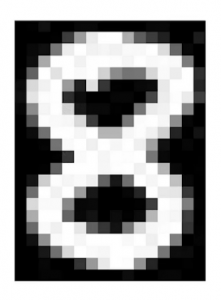

This is the image of a number 8. Now, if we zoom in further and if you look closely you can see that the images getting distorted and you would see some small square boxes on this image.

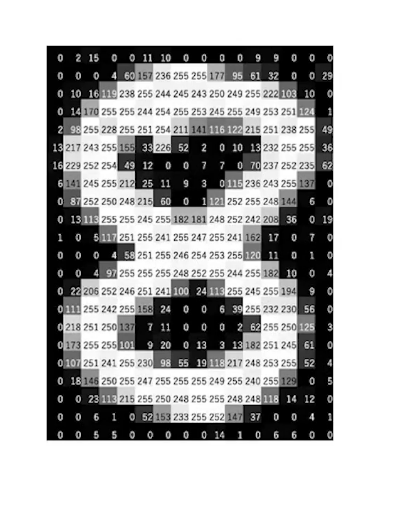



Each of these pixels is denoted as the numerical value and these numbers are called Pixel Values. These pixel values denote the intensity of the pixels. For a grayscale or b&w image, we have pixel values ranging from 0 to 255.

The smaller numbers closer to zero represent the darker shade while the larger numbers closer to 255 represent the lighter or the white shade.


Now let’s quickly summarize the points that we’ve learned so far-

*   Images are stored in the form of a matrix of numbers in a computer where these numbers are known as pixel values.
*   These pixel values represent the intensity of each pixel.
*   0 represents black and 255 represents white.
*   The matrix of numbers is known as the channel and in the case of a grayscale image, we have only one channel.













## **How Colored images are stored on a computer?**
[Click here](https://www.analyticsvidhya.com/blog/2021/03/grayscale-and-rgb-format-for-storing-images/#:~:text=Images%20are%20stored%20in%20the%20form%20of%20a%20matrix%20of,black%20and%20255%20represents%20white.)

## **Normalization of Grayscale Images**



The code line X_train_gray_norm = (X_train_gray - 128)/128 is a normalization step applied to a set of gray scale images represented by X_train_gray.

The normalization technique used here is called min-max scaling, which scales the pixel values between 0 and 1. In this case, the pixel values are first centered around zero by subtracting 128 from each pixel (which is half of the maximum pixel value of 255), and then scaled by 128.

By applying this normalization, the pixel values of the images are now in the range of -1 to 1. This can be useful for certain machine learning algorithms, as it can help to improve convergence during training and prevent issues related to numerical stability.

In [ ]:
X_train_gray_norm = (X_train_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

In [ ]:
X_train_gray_norm

array([[[[ 0.70572917],
         [ 0.4296875 ],
         [-0.4453125 ],
         ...,
         [-0.6328125 ],
         [-0.640625  ],
         [-0.63802083]],

        [[ 0.28125   ],
         [-0.09895833],
         [-0.578125  ],
         ...,
         [-0.63541667],
         [-0.63802083],
         [-0.6484375 ]],

        [[-0.07291667],
         [-0.5078125 ],
         [-0.640625  ],
         ...,
         [-0.57291667],
         [-0.55729167],
         [-0.55208333]],

        ...,

        [[-0.27864583],
         [-0.4140625 ],
         [-0.47135417],
         ...,
         [-0.359375  ],
         [-0.6328125 ],
         [-0.65885417]],

        [[-0.3125    ],
         [-0.47395833],
         [-0.5       ],
         ...,
         [-0.52083333],
         [-0.62760417],
         [-0.63541667]],

        [[-0.44791667],
         [-0.515625  ],
         [-0.4765625 ],
         ...,
         [-0.5078125 ],
         [-0.61979167],
         [-0.6953125 ]]],


       [[[-0.81770833],


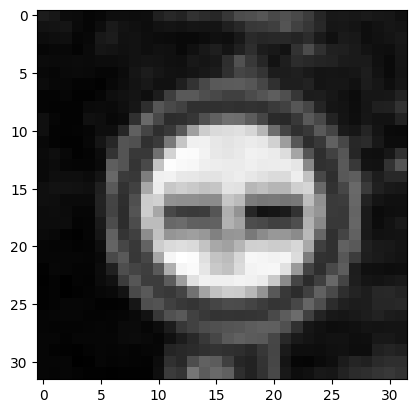

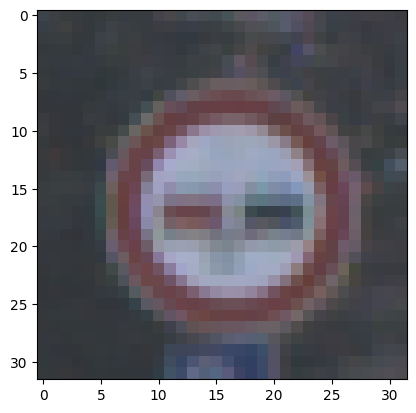

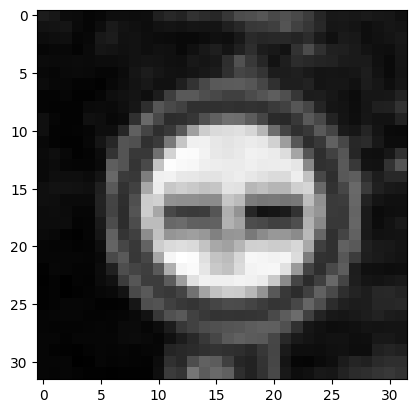

In [ ]:
#  generates a random integer
i = random.randint(1, len(X_train_gray))

# displays the selected image from X_train_gray using a grayscale color map.
# The squeeze() function is used to remove any dimensions of size 1 from the selected image.
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')            
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')


###.squeeze() Method Explanation

The .squeeze() function is a numpy function that removes dimensions of size 1 from a given numpy array.

In the context of image processing, images are typically represented as numpy arrays with dimensions [height, width, channels]. For grayscale images, the number of channels is typically 1, whereas for RGB images, the number of channels is 3. However, it is possible for an image to have a single channel with size 1, which can cause issues when displaying the image or passing it to a model.

The .squeeze() function removes these dimensions of size 1, resulting in an array with fewer dimensions. For example, if an array has shape [height, width, 1], applying .squeeze() will remove the third dimension and result in an array with shape [height, width]. Similarly, if an array has shape [1, height, width, 1], applying .squeeze() twice will result in an array with shape [height, width].

In the context of the code snippet provided in the previous question, .squeeze() is used to remove any dimensions of size 1 from the selected grayscale image before displaying it with plt.imshow(). This can be useful for avoiding issues with displaying the image, as plt.imshow() expects a 2D array for grayscale images.

###cmap ='gray' Explanation

In matplotlib, the cmap parameter is used to specify the color map to be used for visualizing an image.

A color map, also known as a colormap or a palette, is a mapping between a range of values and a range of colors. When an image is displayed using a color map, each pixel value is mapped to a specific color based on its value. The resulting image is a visualization of the original data in which the colors convey information about the values of the pixels.

The cmap='gray' parameter specifically specifies the grayscale color map to be used for displaying an image. The grayscale color map maps values between 0 and 1 to shades of gray, with 0 being black and 1 being white. This is useful for visualizing grayscale images in which each pixel has a single value representing its intensity.

Alternatively, other color maps can be used to display images in which each pixel has multiple values (e.g., for RGB images). Some common examples of other color maps include 'viridis', 'jet', 'coolwarm', 'hot', etc.

# TASK #5: UNDERSTAND THE THEORY AND INTUITION BEHIND CONVOLUTIONAL NEURAL NETWORKS 

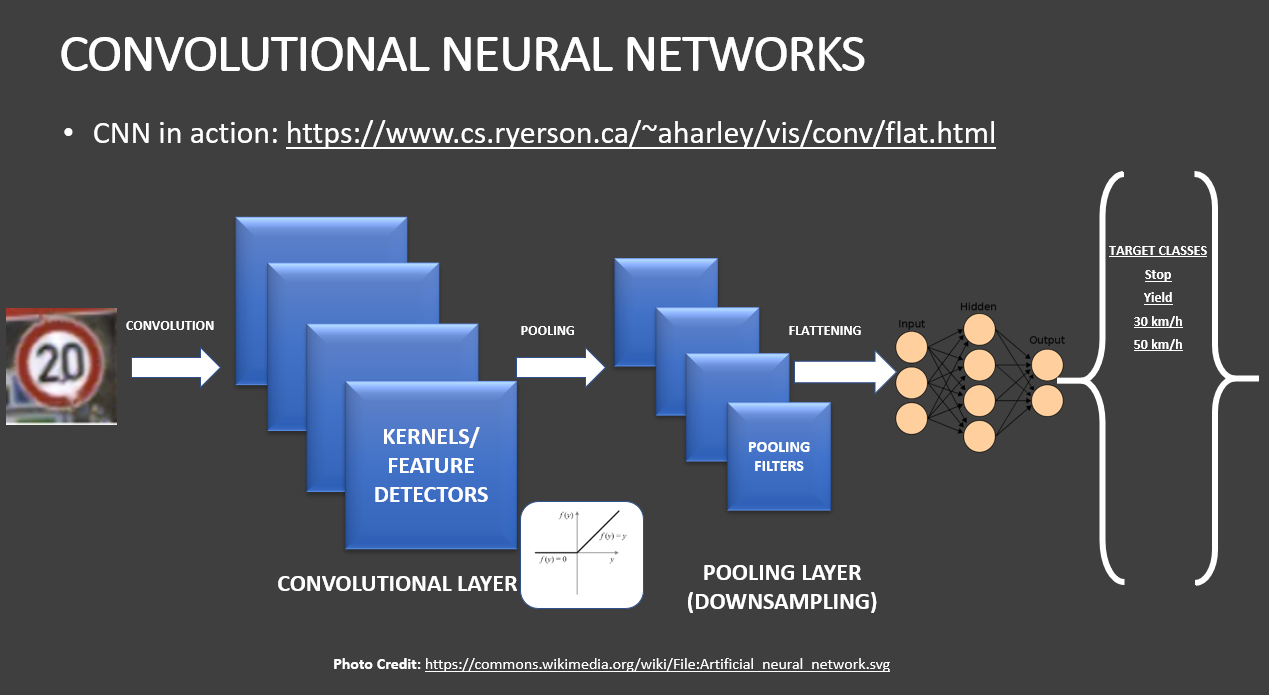

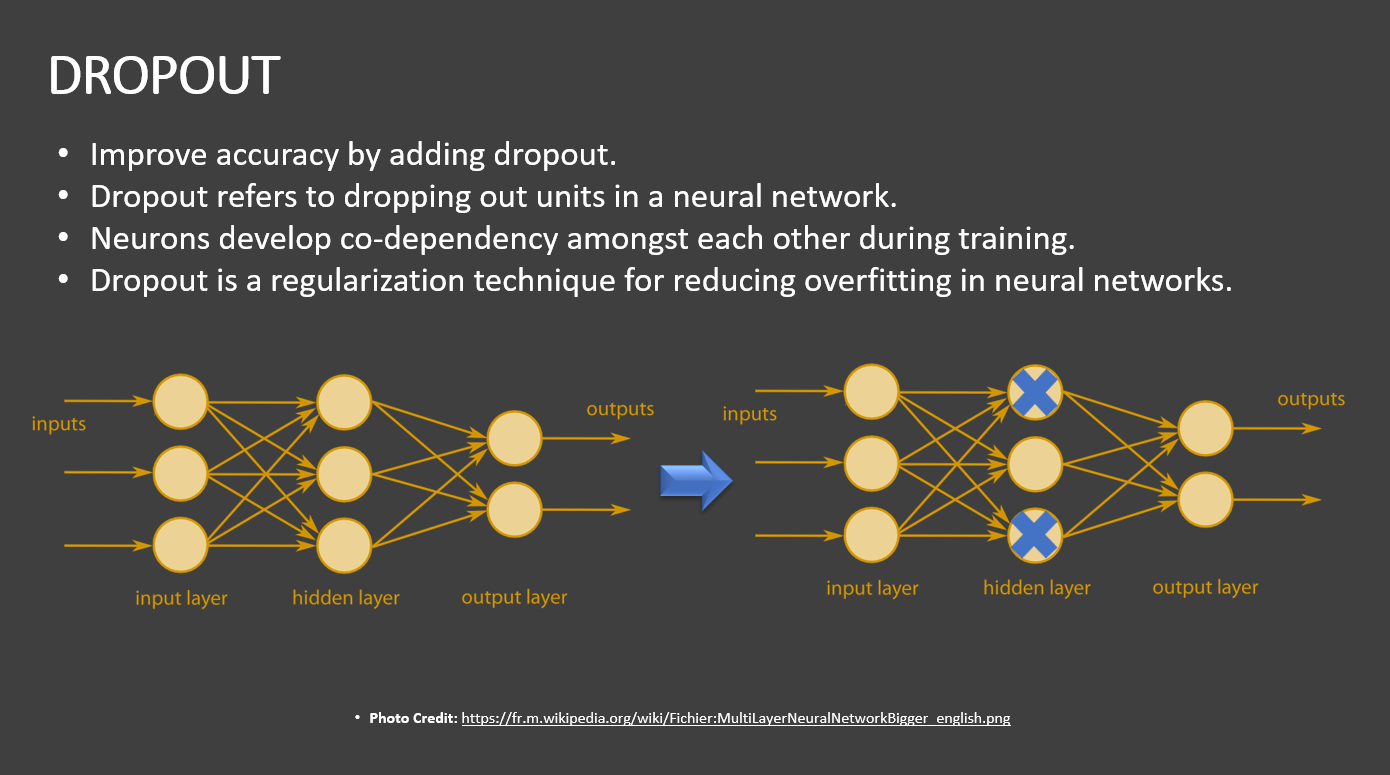

## Visulaize the Convolutional Neural Network (CNN) in 2D
[CLick here](https://adamharley.com/nn_vis/cnn/2d.html)

## Visualize the Convolutional Neural Network (CNN) in 3D

[Click here](https://adamharley.com/nn_vis/cnn/3d.html)

## Original Website

[Click here](https://adamharley.com/nn_vis/#:~:text=Convolutional%20neural%20networks%20are%20at,network%2C%20rather%20than%20the%20behavior.)

# TASK #6: BUILD DEEP CONVOLUTIONAL NEURAL NETWORK MODEL

In [ ]:
from tensorflow.keras import datasets, layers, models

CNN = models.Sequential()

CNN.add(layers.Conv2D(6, (5,5), activation = 'relu', input_shape = (32,32,1)))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Dropout(0.2))

CNN.add(layers.Conv2D(16, (5,5), activation = 'relu'))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Flatten())

CNN.add(layers.Dense(120, activation = 'relu'))

CNN.add(layers.Dense(84, activation = 'relu'))

CNN.add(layers.Dense(43, activation = 'softmax'))
CNN.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_6 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 6)         0         
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_7 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten_3 (Flatten)         (None, 400)              

##Explantion of above Code

Here's a brief explanation of what each layer in the network does:


1.   layers.Conv2D(6, (5,5), activation = 'relu', input_shape = (32,32,1)): This is a convolutional layer with 6 filters of size 5x5. The input shape is (32,32,1), which means that the input image has a height and width of 32 pixels and a single channel (since the images are grayscale).

2.   layers.AveragePooling2D(): This is a pooling layer that reduces the spatial dimensions of the output from the previous layer by taking the average of each 2x2 block of pixels.

3.   layers.Dropout(0.2): This is a regularization technique that randomly drops out 20% of the neurons in the layer during training, which helps to prevent overfitting.

4.   layers.Conv2D(16, (5,5), activation = 'relu'): This is another convolutional layer with 16 filters of size 5x5.


5.  layers.AveragePooling2D(): Another pooling layer that reduces the spatial dimensions of the output from the previous layer.

6.   layers.Flatten(): This layer flattens the output from the previous layer into a 1D array, which can be fed into a fully connected layer.

7.   layers.Dense(120, activation = 'relu'): This is a fully connected layer with 120 neurons and a ReLU activation function.

8.   layers.Dense(84, activation = 'relu'): Another fully connected layer with 84 neurons and a ReLU activation function.


9.   layers.Dense(43, activation = 'softmax'): This is the output layer of the network, with 43 neurons (since there are 43 classes in the GTSRB dataset) and a softmax activation function, which produces a probability distribution over the classes.













 **What is Filter in CNN ?**

 
In the context of Convolutional Neural Networks (CNNs), a filter refers to a set of learnable weights that are used to perform a convolution operation on an input image.

In the line of code layers.Conv2D(16, (5,5), activation = 'relu'), the number 16 refers to the number of filters in the layer. Each filter in this layer is a 5x5 matrix of learnable weights that is convolved with the input image to produce a set of feature maps.

The purpose of using multiple filters in a convolutional layer is to allow the network to learn multiple features from the input image. Each filter can learn to detect a different feature, such as an edge, a corner, or a particular texture. By using multiple filters, the network can learn to detect a wide variety of features that are useful for the classification task.

In the case of this specific line of code, the Conv2D layer has 16 filters, which means that the layer is able to detect 16 different features from the input image.





# TASK #7: COMPILE AND TRAIN DEEP CNN MODEL

In [ ]:
CNN.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = CNN.fit(X_train_gray_norm,
                 y_train, 
                 batch_size = 500,
                 epochs = 50,
                 verbose = 1,
                 validation_data = (X_validation_gray_norm, y_validation))

Epoch 1/50
70/70 [==============================] - 39s 541ms/step - loss: 3.2295 - accuracy: 0.1618 - val_loss: 2.8604 - val_accuracy: 0.2465
Epoch 2/50
70/70 [==============================] - 25s 349ms/step - loss: 1.9724 - accuracy: 0.4543 - val_loss: 1.6367 - val_accuracy: 0.5261
Epoch 3/50
70/70 [==============================] - 22s 316ms/step - loss: 1.2101 - accuracy: 0.6391 - val_loss: 1.0857 - val_accuracy: 0.6934
Epoch 4/50
70/70 [==============================] - 22s 314ms/step - loss: 0.8733 - accuracy: 0.7409 - val_loss: 0.8529 - val_accuracy: 0.7578
Epoch 5/50
70/70 [==============================] - 22s 312ms/step - loss: 0.6972 - accuracy: 0.7937 - val_loss: 0.7516 - val_accuracy: 0.7828
Epoch 6/50
70/70 [==============================] - 23s 329ms/step - loss: 0.5894 - accuracy: 0.8298 - val_loss: 0.6799 - val_accuracy: 0.8057
Epoch 7/50
70/70 [==============================] - 22s 318ms/step - loss: 0.5052 - accuracy: 0.8522 - val_loss: 0.6251 - val_accuracy: 0.8249

## Explanation of above code

### **CNN.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])**

This line of code compiles the CNN model with the Adam optimizer, sparse categorical cross-entropy loss function, and accuracy metric.

The optimizer used is Adam, which is a popular optimization algorithm used for training neural networks. Adam stands for Adaptive Moment Estimation and is an extension of stochastic gradient descent (SGD). It maintains a separate learning rate for each weight and updates the learning rates adaptively during training.

The loss function used is sparse categorical cross-entropy. This is a loss function commonly used for multi-class classification problems where the classes are mutually exclusive (i.e., an input can only belong to one class). It computes the cross-entropy loss between the predicted probability distribution and the true label, where the true label is represented as an integer index.

The metric used to evaluate the performance of the model during training and testing is accuracy. Accuracy is the proportion of correctly classified images in the dataset.

### **what does we mean with loss here ?**


"loss" refers to a function that measures the difference between the predicted output of a model and the true output. The goal of training a machine learning model is to minimize this loss function, which is accomplished through an iterative process of adjusting the model's parameters (weights and biases) using an optimization algorithm.

In the specific line of code you provided, the loss function used is 'sparse_categorical_crossentropy'

### **what does we mean by optimizer here ?**



an optimizer is an algorithm used to adjust the parameters of a model (e.g., weights and biases) during training in order to minimize the loss function. The goal of the optimizer is to find the optimal set of model parameters that minimize the loss function and improve the model's accuracy and performance.

In the specific line of code you provided, the optimizer used is 'Adam'

### **history = CNN.fit(X_train_gray_norm,y_train, batch_size = 500,nb_epoch = 50,verbose = 1,validation_data = (X_validation_gray_norm, y_validation))**



The fit method is used to train a machine learning model. It takes as input the training data (X_train_gray_norm and y_train), the batch size (which specifies how many samples to use in each iteration), the number of epochs (which specifies how many times to iterate over the entire training set), and other optional parameters such as validation data and verbosity.

In the specific line of code you provided, the fit method is used to train the CNN model on the training data X_train_gray_norm and y_train. The model is trained for 50 epochs, with a batch size of 500. The verbose parameter is set to 1, which means that progress updates are printed during training. Additionally, validation data is provided using the validation_data parameter, which specifies a tuple of (X_validation_gray_norm, y_validation).

During training, the model's parameters (weights and biases) are updated using the optimizer (Adam) based on the loss function (sparse categorical cross-entropy). The fit method returns a history object that contains information about the training process, such as the loss and accuracy at each epoch.

# TASK #8: ASSESS TRAINED CNN MODEL PERFORMANCE 

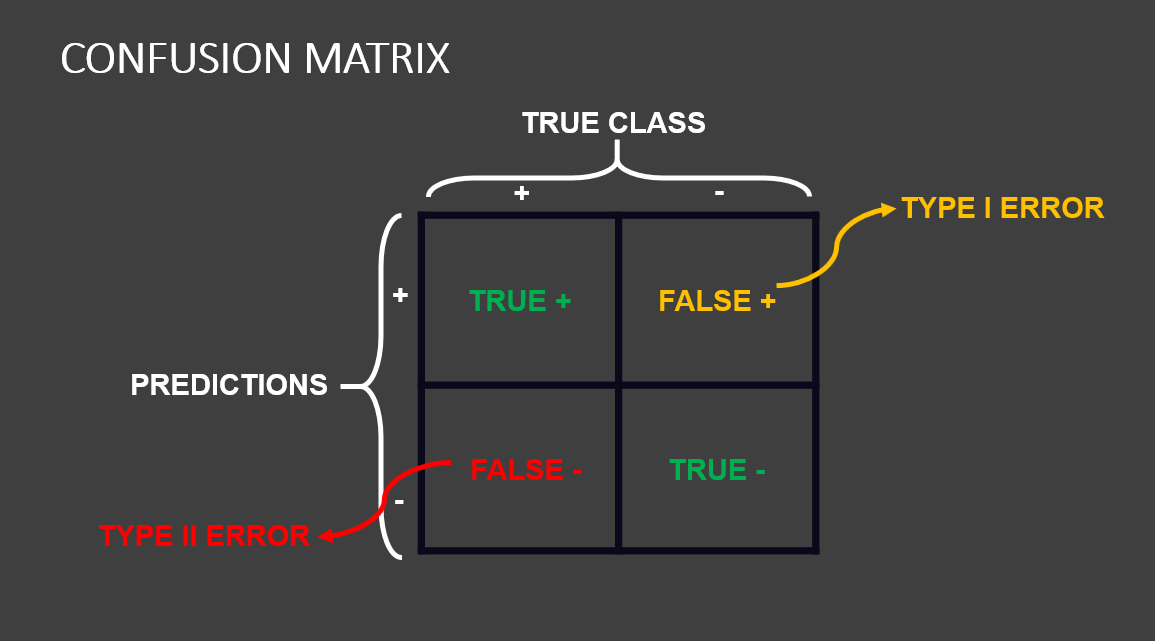

In [ ]:
score = CNN.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 4s 9ms/step - loss: 0.6208 - accuracy: 0.9013
Test Accuracy: 0.9012668132781982


**Explanation of above code**

The evaluate method is used to evaluate the trained model's performance on a test dataset. It takes as input the test data (X_test_gray_norm and y_test) and returns the model's performance metrics, such as the loss and accuracy.

In the specific line of code you provided, the evaluate method is used to evaluate the trained CNN model on the test dataset. The X_test_gray_norm and y_test are passed as input to the method. The score variable is assigned the returned performance metrics.

Finally, the test accuracy is printed using the print function. The accuracy is obtained from the score variable, which is a list containing the model's test loss as the first element and the accuracy as the second element. Therefore, score[1] is used to print the test accuracy.

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Explanation of above code**

The history object returned by the fit method contains information about the training process of a machine learning model, such as the loss and accuracy at each epoch. The history object is a dictionary-like object with keys corresponding to the training metrics and their values as a list of the corresponding metric values at each epoch.

In the specific line of code you provided, history.history.keys() is used to print the keys of the history object. This will output a list of strings representing the names of the metrics that were recorded during training. Some common keys in the history object include:


*   'loss': The training loss at each epoch.

*   'val_loss': The validation loss at each epoch (if validation data was provided during training).

*   'accuracy': The training accuracy at each epoch.

*   'val_accuracy': The validation accuracy at each epoch (if validation data was provided during training).


By printing the keys of the history object, you can see which metrics were recorded during training and use them to analyze the performance of the model.

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

**Explanation of above code**

In the code you provided, the variables accuracy, val_accuracy, loss, and val_loss are assigned the values of specific keys in the history.history dictionary.



*   accuracy: The accuracy variable is assigned the values of the 'accuracy' key in the history.history dictionary. This contains a list of the training accuracy at each epoch.

*   val_accuracy: The val_accuracy variable is assigned the values of the 'val_accuracy' key in the history.history dictionary. This contains a list of the validation accuracy at each epoch, if validation data was provided during training.
*   loss: The loss variable is assigned the values of the 'loss' key in the history.history dictionary. This contains a list of the training loss at each epoch.

*   val_loss: The val_loss variable is assigned the values of the 'val_loss' key in the history.history dictionary. This contains a list of the validation loss at each epoch, if validation data was provided during training.

By assigning these values to separate variables, you can analyze and visualize the performance of the model during training and validation, and potentially make improvements to the model.

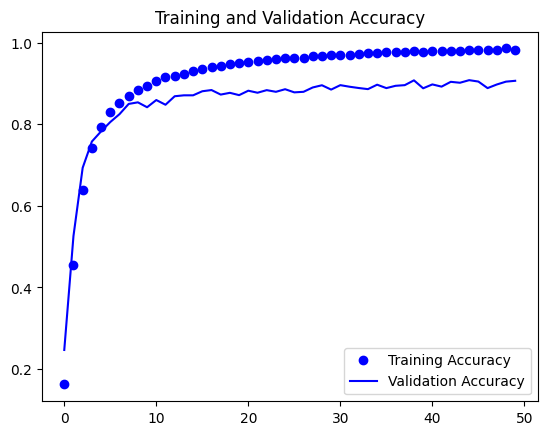

In [ ]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

**Explanation of above code**

The code you provided uses the matplotlib library to create a line plot of the training and validation accuracy over the course of training. Here's how the code works:





*   epochs = range(len(accuracy)): This creates a range object containing the indices of the accuracy list, which correspond to the number of epochs that the model was trained for.

*   plt.plot(epochs, accuracy, 'bo', label='Training Accuracy'): This creates a blue dot ('bo') at each epoch with the corresponding training accuracy. The label argument specifies the label for the training accuracy line in the legend.
*   plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy'): This creates a blue line ('b') connecting the validation accuracy at each epoch. The label argument specifies the label for the validation accuracy line in the legend.


*   plt.title('Training and Validation Accuracy'): This sets the title of the plot.


*   
plt.legend(): This displays a legend in the plot, which includes the labels specified in the plt.plot calls.












By plotting the training and validation accuracy over the course of training, you can get an idea of how well the model is generalizing to new data. If the validation accuracy is consistently lower than the training accuracy, it may indicate that the model is overfitting. If the validation accuracy is significantly lower than the training accuracy, it may indicate that the model is not learning the general patterns in the data.

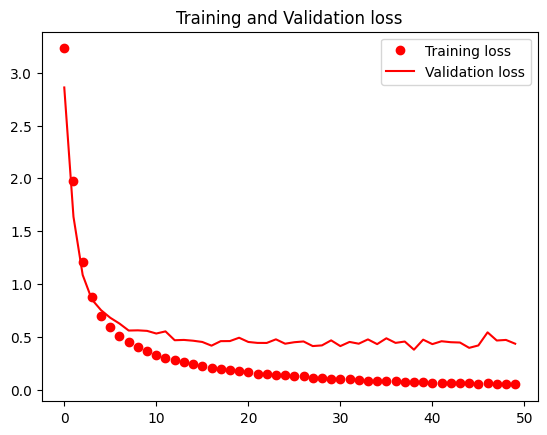

In [ ]:
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

**Explanation of above code**

The code you provided uses the matplotlib library to create a line plot of the training and validation loss over the course of training. Here's how the code works:



*   
plt.plot(epochs, loss, 'ro', label='Training loss'): This creates a red dot ('ro') at each epoch with the corresponding training loss. The label argument specifies the label for the training loss line in the legend.

*   plt.plot(epochs, val_loss, 'r', label='Validation loss'): This creates a red line ('r') connecting the validation loss at each epoch. The label argument specifies the label for the validation loss line in the legend.
*  plt.title('Training and Validation loss'): This sets the title of the plot.


*   plt.legend(): This displays a legend in the plot, which includes the labels specified in the plt.plot calls.










By plotting the training and validation loss over the course of training, you can get an idea of how well the model is learning the patterns in the data. If the validation loss is consistently higher than the training loss, it may indicate that the model is overfitting. If the validation loss is not decreasing over time, it may indicate that the model is not able to learn the patterns in the data.

In [ ]:

# predict probabilities for each class
y_pred_prob = CNN.predict(X_test_gray_norm)

# take the class with the highest probability as the predicted class
predicted_classes = np.argmax(y_pred_prob, axis=1)

395/395 [==============================] - 4s 10ms/step


**Explanation of above code**

The code above uses a trained Convolutional Neural Network (CNN) to predict the probabilities for each class of an input data set X_test_gray_norm. The predicted probabilities are stored in y_pred_prob.

Then, np.argmax() function is used to take the class with the highest probability as the predicted class for each input data in X_test_gray_norm. The axis=1 argument specifies that the maximum value is to be found along the columns of the y_pred_prob array, which represents the probabilities for each class. The resulting predicted classes are stored in predicted_classes.

Note that y_pred_prob is an array of shape (num_samples, num_classes), where num_samples is the number of input data samples and num_classes is the number of classes. predicted_classes is an array of shape (num_samples,), where each element represents the predicted class for the corresponding input data sample.

<Axes: >

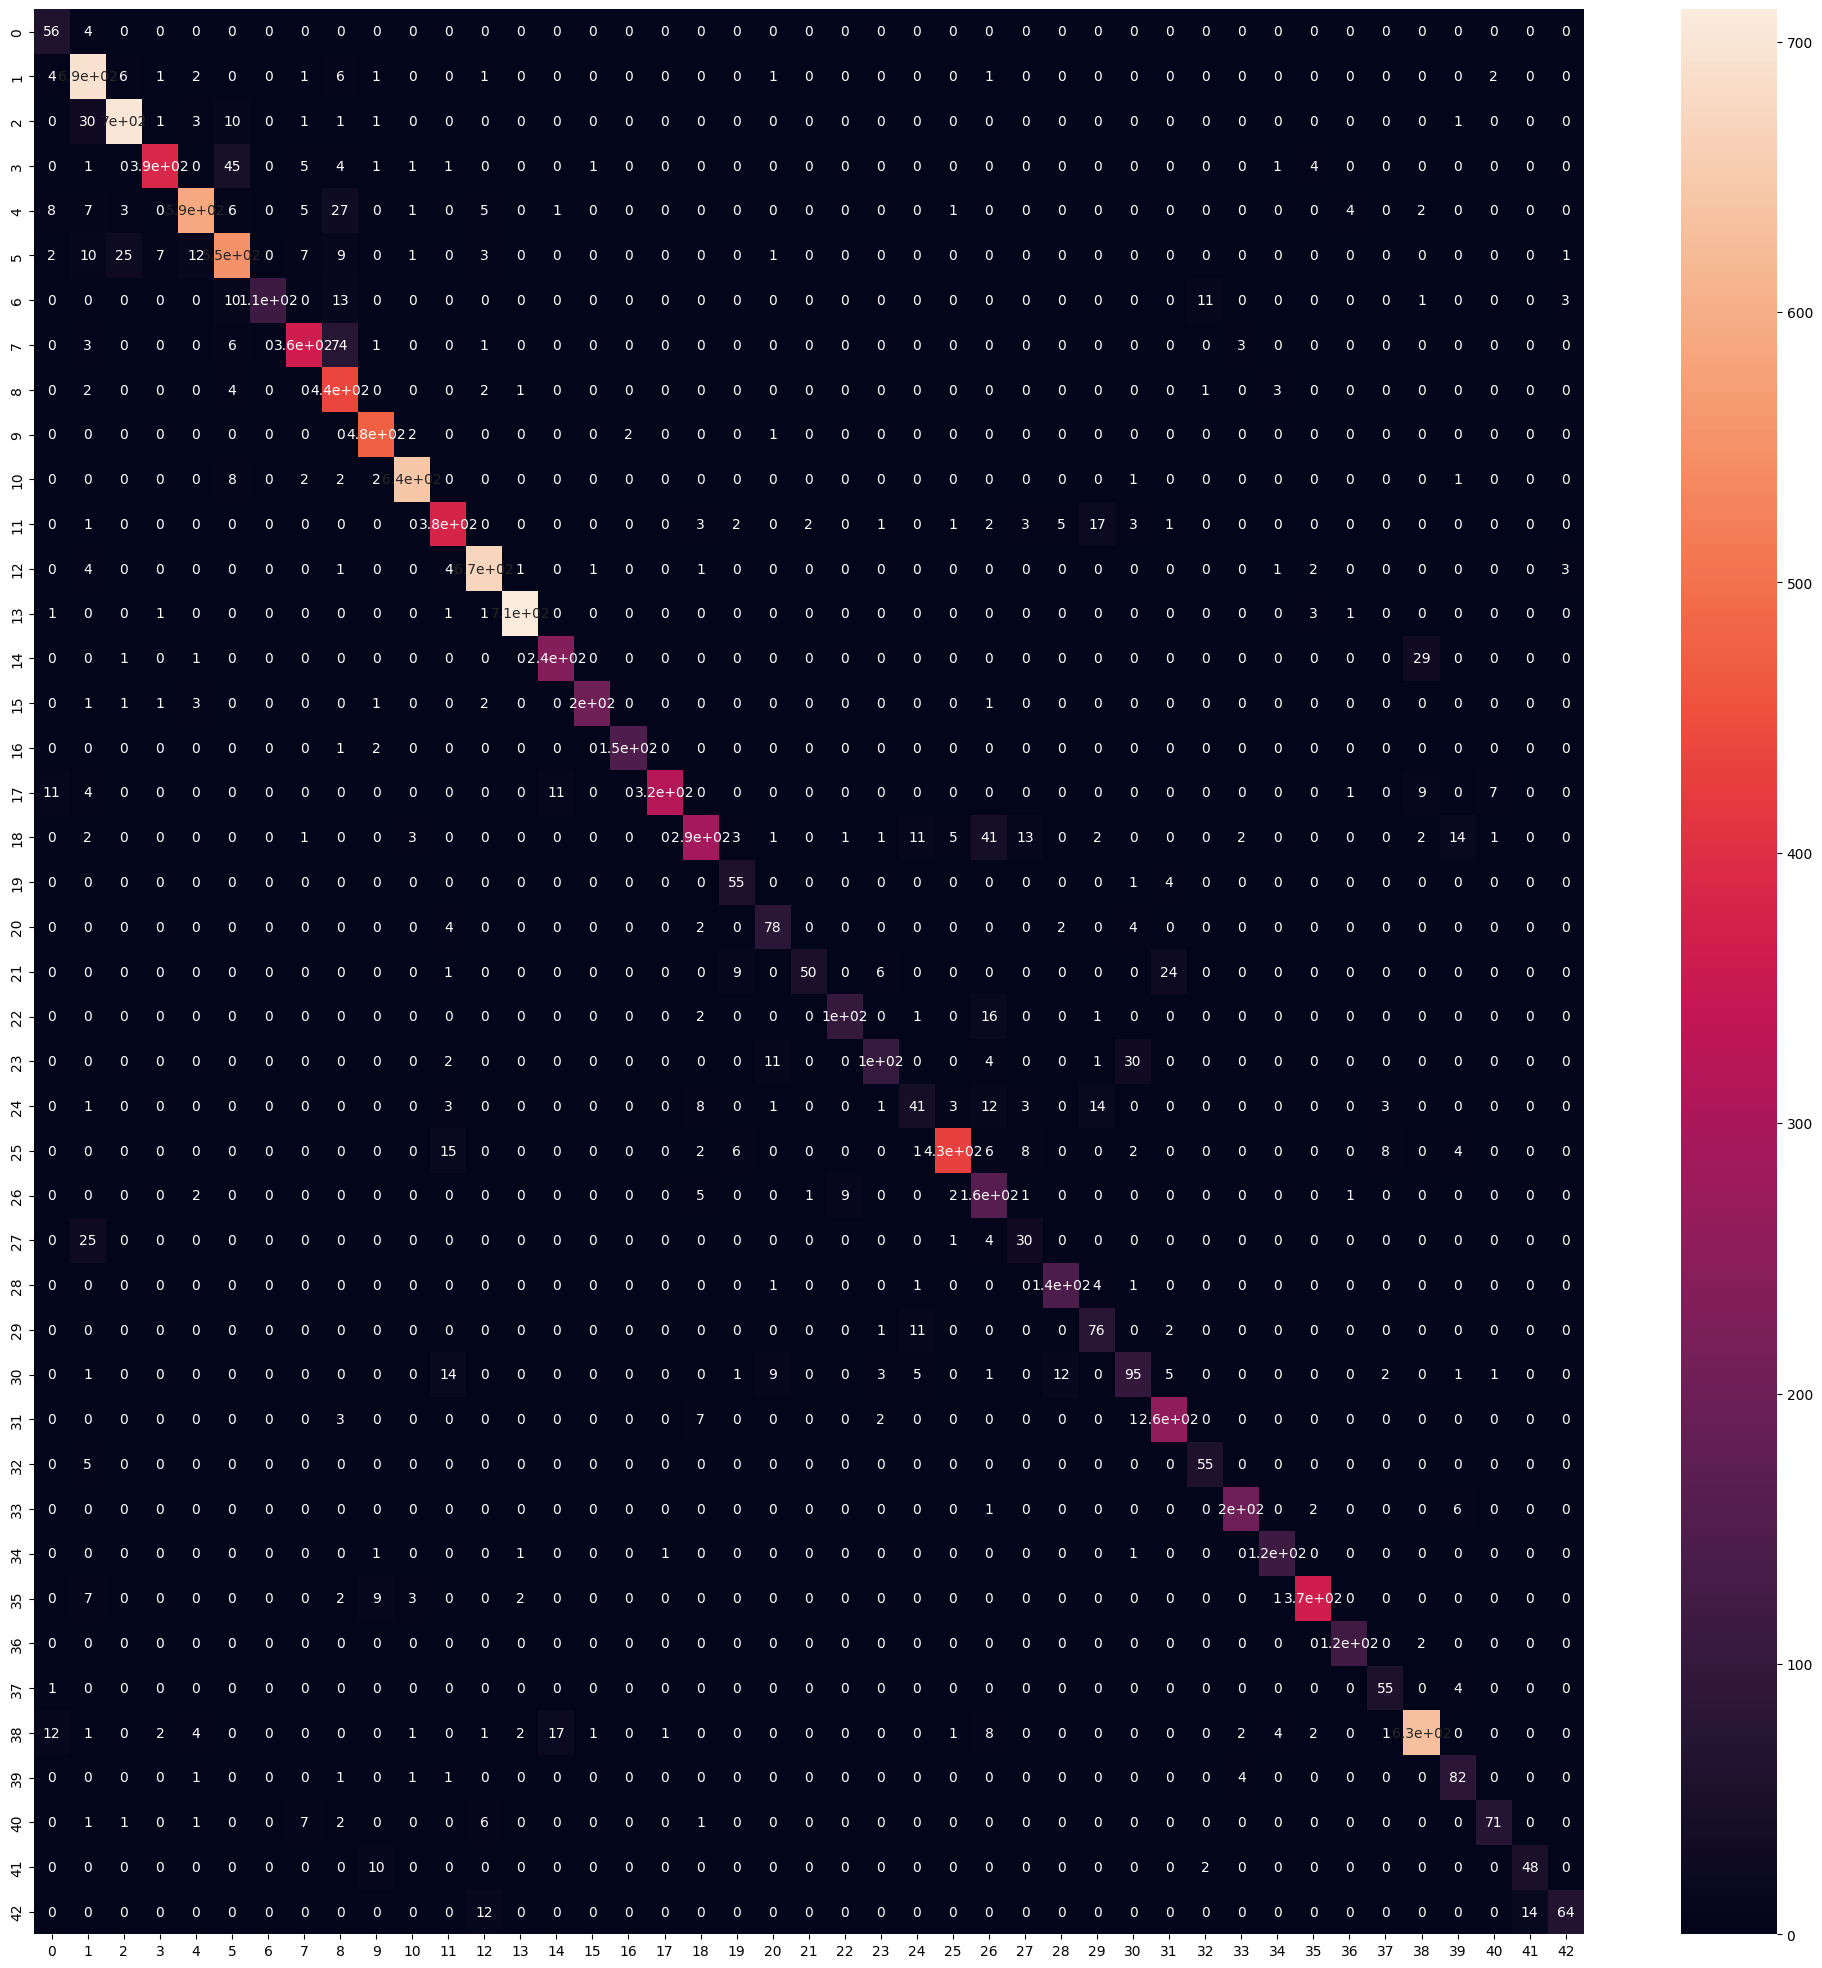

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

**Explanation of above code**

This code uses the confusion_matrix function from the sklearn.metrics module to calculate the confusion matrix between the predicted class labels (predicted_classes) and the true class labels (y_true) for the test set.


The sns.heatmap function from the seaborn library is used to plot the confusion matrix as a heatmap. The annot=True parameter displays the values of the matrix in each cell of the heatmap.

By visualizing the confusion matrix, you can see which classes are being misclassified by the model and where the model is performing well.

In [ ]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    

**Explanation of above code**

This code block creates a grid of subplots with L rows and W columns, and displays images from the test set on each subplot. The figsize parameter sets the size of the figure in inches.

The axes.ravel() method converts the 2D array of subplot axes into a 1D array, which makes it easier to loop over them. The loop then iterates over the subplots and displays the corresponding image from the test set, along with the predicted class and true class labels.

The set_title() method sets the title of each subplot with the predicted and true class labels. The axis('off') method removes the axis labels and tick marks from each subplot.

Finally, the subplots_adjust() method adjusts the spacing between the subplots, with wspace setting the width space between subplots.

# CONGRATULATIONS ON FINISHING THE PROJECT!

# APPENDIX

- In this case study, we want to classify images of traffic signs using deep Convolutional Neural Networks (CNNs).
- The dataset consists of 43 different classes of images. 
- Classes are as listed below: 
  - 0 = Speed limit (20km/h) 
  - 1 = Speed limit (30km/h)
  - 2 = Speed limit (50km/h) 
  - 3 = Speed limit (60km/h)
  - 4 = Speed limit (70km/h) 
  - 5 = Speed limit (80km/h)
  - 6 = End of speed limit (80km/h)
  - 7 = Speed limit (100km/h)
  - 8 = Speed limit (120km/h)
  - 9 = No passing
  - 10 = No passing for vehicles over 3.5 metric tons
  - 11 = Right-of-way at the next intersection
  - 12 = Priority road
  - 13 = Yield
  - 14 = Stop
  - 15 = No vehicles
  - 16 = Vehicles over 3.5 metric tons prohibited
  - 17 = No entry
  - 18 = General caution
  - 19 = Dangerous curve to the left
  - 20 = Dangerous curve to the right
  - 21 = Double curve
  - 22 = Bumpy road
  - 23 = Slippery road
  - 24 = Road narrows on the right
  - 25 = Road work
  - 26 = Traffic signals
  - 27 = Pedestrians
  - 28 = Children crossing 
  - 29 = Bicycles crossing
  - 30 = Beware of ice/snow
  - 31 = Wild animals crossing
  - 32 = End of all speed and passing limits
  - 33 = Turn right ahead
  - 34 = Turn left ahead
  - 35 = Ahead only
  - 36 = Go straight or right
  - 37 = Go straight or left
  - 38 = Keep right
  - 39 = Keep left
  - 40 = Roundabout mandatory
  - 41 = End of no passing
  - 42 = End of no passing by vehicles over 3.5 metric tons

- Citation
J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011. 
@inproceedings{Stallkamp-IJCNN-2011, author = {Johannes Stallkamp and Marc Schlipsing and Jan Salmen and Christian Igel}, booktitle = {IEEE International Joint Conference on Neural Networks}, title = {The {G}erman {T}raffic {S}ign {R}ecognition {B}enchmark: A multi-class classification competition}, year = {2011}, pages = {1453--1460} }